# About this notebook
### Approach for data management:
The source of all data is documented, however it is downloaded as a local file for ease of use



## Data Source 1 - National Mental Health Services Survey (N-MHSS)
Mental Health Facilities Data

https://www.datafiles.samhsa.gov/dataset/national-mental-health-services-survey-2020-n-mhss-2020-ds0001

Codebook here: https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/N-MHSS-2020/N-MHSS-2020-datasets/N-MHSS-2020-DS0001/N-MHSS-2020-DS0001-info/N-MHSS-2020-DS0001-info-codebook.pdf

Dataset here: https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/N-MHSS-2020/N-MHSS-2020-datasets/N-MHSS-2020-DS0001/N-MHSS-2020-DS0001-bundles-with-study-info/N-MHSS-2020-DS0001-bndl-data-csv_v1.zip
        
Some information on this source dataset
N-MHSS is an annual survey that collects data on the services and characteristics of all known mental health treatment facilities in the 50 states, the District of Columbia, and the U.S. territories and jurisdictions. Every other year (since 2014), the survey also collects data on the number and demographics of people served in these facilities as of a specified survey reference date.

N-MHSS is the only source of national and state-level data on the mental health service delivery system reported by both public and private specialty mental health treatment facilities, including:

Public and private psychiatric hospitals
Nonfederal general hospitals with separate psychiatric units
U.S. Department of Veterans Affairs medical centers
Residential treatment centers for children and adults
Community mental health centers
Outpatient, day treatment, or partial hospitalization mental health facilities
Multi-setting (nonhospital) mental health facilities
N-MHSS complements the information collected through SAMHSA’s National Survey of Substance Abuse Treatment Services (N-SSATS). Treatment facility information from N-MHSS is used to populate the mental health component of SAMHSA’s Behavioral Health Treatment Services Locator.

## Data Source 2 - National Survey on Drug Use and Health (NSDUH) 

https://www.datafiles.samhsa.gov/dataset/national-survey-drug-use-and-health-2020-nsduh-2020-ds0001
    
Codebook here: https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/NSDUH-2020/NSDUH-2020-datasets/NSDUH-2020-DS0001/NSDUH-2020-DS0001-info/NSDUH-2020-DS0001-info-codebook.pdf
        
Dataset here: https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/NSDUH-2020/NSDUH-2020-datasets/NSDUH-2020-DS0001/NSDUH-2020-DS0001-bundles-with-study-info/NSDUH-2020-DS0001-bndl-data-tsv_v1.zip
        
Population Data

The NSDUH series, formerly the National Household Survey on Drug Abuse, is the leading source of statistical information on the use of illicit drugs, alcohol, and tobacco and mental health issues in the United States. The survey tracks trends in specific substance use and mental illness measures and assesses substance use disorders and treatment for these disorders.

The population of the NSDUH series is the general civilian population aged 12 and older. Questions include age at first use, as well as lifetime, annual, and past-month use of the following drugs: alcohol, marijuana, cocaine (including crack), hallucinogens, heroin, inhalants, tobacco, pain relievers, tranquilizers, stimulants, and sedatives. The survey covers substance use treatment history and perceived need for treatment, and it includes questions from the “Diagnostic and Statistical Manual (DSM) of Mental Disorders” (DSM) that allow diagnostic criteria to be applied.

Respondents are also asked about personal and family income, health care access and coverage, illegal activities and arrest records, problems resulting from the use of drugs, and perceptions of risks. Demographic data include gender, race, age, ethnicity, educational level, employment status, income level, veteran status, household composition, and population density.

## Data Source 3 - Mental Health Client-Level Data (MH-CLD) 

https://www.datafiles.samhsa.gov/dataset/mental-health-client-level-data-2019-mh-cld-2019-ds0001
    
Codebook here: https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/MH-CLD-2019/MH-CLD-2019-datasets/MH-CLD-2019-DS0001/MH-CLD-2019-DS0001-info/MH-CLD-2019-DS0001-info-codebook.pdf
        
Dataset here: https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/MH-CLD-2019/MH-CLD-2019-datasets/MH-CLD-2019-DS0001/MH-CLD-2019-DS0001-bundles-with-study-info/MH-CLD-2019-DS0001-bndl-data-csv_v1.zip
        
Client-Level Mental Health Data

MH-CLD and the Mental Health Treatment Episode Data Set (MH-TEDS) provide information on mental health diagnoses and the mental health treatment services, outcomes, and demographic and substance use characteristics of people in mental health treatment facilities. This information comes from facilities that report to individual state administrative data systems.    
        

In [2]:
!pip3 install pandas
!pip3 install numpy
!pip3 show pandas

Name: pandas
Version: 1.3.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages
Requires: numpy, python-dateutil, pytz
Required-by: 


## PART A - Client Level Mental Health Data Analysis

Goal:
In this section Client-Level Mental Health Data for 2 years 2019 and 2014 is used.
Using this data, exploratory analysis is done in the following areas
* Understanding the distribution of mental health disorders by type and by state
* Comparing the number of mental health cases (MHC) and substance abuse cases(SAC)

Further analysis is done to 
* Check if there is a correlation between the two
* Compare the numbers of MHC and SAC between the years 2014 and 2019.

These years are picked because I have the corresponding data for the Mental health services facilities for the same years to
do further analysis in the next part.

Approach:
Since the 2 files for 2014 and 2019 are quite large and jupyterlab environment is struggling with it, 
I trim data before merging them so I have smaller data sets to work with. (Expecting jupyterlab to cope better)

In [2]:
%%bash
wget https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/MH-CLD-2019/MH-CLD-2019-datasets/MH-CLD-2019-DS0001/MH-CLD-2019-DS0001-bundles-with-study-info/MH-CLD-2019-DS0001-bndl-data-csv_v1.zip
unzip MH-CLD-2019-DS0001-bndl-data-csv_v1.zip
wget https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/MH-CLD-2014/MH-CLD-2014-datasets/MH-CLD-2014-DS0001/MH-CLD-2014-DS0001-bundles-with-study-info/MH-CLD-2014-DS0001-bndl-data-csv_1.zip
unzip MH-CLD-2014-DS0001-bndl-data-csv_1.zip


--2022-05-14 07:49:33--  https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/MH-CLD-2019/MH-CLD-2019-datasets/MH-CLD-2019-DS0001/MH-CLD-2019-DS0001-bundles-with-study-info/MH-CLD-2019-DS0001-bndl-data-csv_v1.zip
Resolving www.datafiles.samhsa.gov (www.datafiles.samhsa.gov)... 3.214.5.147, 75.101.214.125
Connecting to www.datafiles.samhsa.gov (www.datafiles.samhsa.gov)|3.214.5.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56959067 (54M) [application/zip]
Saving to: 'MH-CLD-2019-DS0001-bndl-data-csv_v1.zip'

     0K .......... .......... .......... .......... ..........  0%  544K 1m42s
    50K .......... .......... .......... .......... ..........  0% 1007K 79s
   100K .......... .......... .......... .......... ..........  0% 4.74M 56s
   150K .......... .......... .......... .......... ..........  0% 70.0M 42s
   200K .......... .......... .......... .......... ..........  0% 1.42M 41s
   250K .......... .......... ......

  5000K .......... .......... .......... .......... ..........  9%  289M 4s
  5050K .......... .......... .......... .......... ..........  9%  265M 4s
  5100K .......... .......... .......... .......... ..........  9%  332M 4s
  5150K .......... .......... .......... .......... ..........  9% 14.2M 4s
  5200K .......... .......... .......... .......... ..........  9% 79.7M 4s
  5250K .......... .......... .......... .......... ..........  9% 23.9M 4s
  5300K .......... .......... .......... .......... ..........  9% 17.7M 4s
  5350K .......... .......... .......... .......... ..........  9%  326M 4s
  5400K .......... .......... .......... .......... ..........  9%  144M 4s
  5450K .......... .......... .......... .......... ..........  9% 42.5M 4s
  5500K .......... .......... .......... .......... ..........  9% 27.4M 4s
  5550K .......... .......... .......... .......... .......... 10%  135M 4s
  5600K .......... .......... .......... .......... .......... 10% 38.1M 4s
  5650K ....

 10400K .......... .......... .......... .......... .......... 18% 17.2M 3s
 10450K .......... .......... .......... .......... .......... 18% 45.4M 3s
 10500K .......... .......... .......... .......... .......... 18% 14.2M 3s
 10550K .......... .......... .......... .......... .......... 19% 65.7M 3s
 10600K .......... .......... .......... .......... .......... 19% 45.4M 2s
 10650K .......... .......... .......... .......... .......... 19% 42.8M 2s
 10700K .......... .......... .......... .......... .......... 19% 25.7M 2s
 10750K .......... .......... .......... .......... .......... 19% 67.3M 2s
 10800K .......... .......... .......... .......... .......... 19% 11.2M 2s
 10850K .......... .......... .......... .......... .......... 19% 13.1M 2s
 10900K .......... .......... .......... .......... .......... 19%  265M 2s
 10950K .......... .......... .......... .......... .......... 19% 16.3M 2s
 11000K .......... .......... .......... .......... .......... 19%  127M 2s
 11050K ....

 15800K .......... .......... .......... .......... .......... 28%  326M 2s
 15850K .......... .......... .......... .......... .......... 28% 66.8M 2s
 15900K .......... .......... .......... .......... .......... 28% 51.9M 2s
 15950K .......... .......... .......... .......... .......... 28% 97.1M 2s
 16000K .......... .......... .......... .......... .......... 28% 45.1M 2s
 16050K .......... .......... .......... .......... .......... 28% 23.6M 2s
 16100K .......... .......... .......... .......... .......... 29%  158M 2s
 16150K .......... .......... .......... .......... .......... 29% 63.8M 2s
 16200K .......... .......... .......... .......... .......... 29% 33.8M 2s
 16250K .......... .......... .......... .......... .......... 29% 31.0M 2s
 16300K .......... .......... .......... .......... .......... 29%  326M 2s
 16350K .......... .......... .......... .......... .......... 29% 26.0M 2s
 16400K .......... .......... .......... .......... .......... 29%  317M 2s
 16450K ....

 21200K .......... .......... .......... .......... .......... 38%  296M 1s
 21250K .......... .......... .......... .......... .......... 38% 4.71M 1s
 21300K .......... .......... .......... .......... .......... 38%  315M 1s
 21350K .......... .......... .......... .......... .......... 38% 67.6M 1s
 21400K .......... .......... .......... .......... .......... 38% 37.8M 1s
 21450K .......... .......... .......... .......... .......... 38% 48.8M 1s
 21500K .......... .......... .......... .......... .......... 38% 50.2M 1s
 21550K .......... .......... .......... .......... .......... 38% 55.5M 1s
 21600K .......... .......... .......... .......... .......... 38% 85.2M 1s
 21650K .......... .......... .......... .......... .......... 39% 24.8M 1s
 21700K .......... .......... .......... .......... .......... 39% 28.7M 1s
 21750K .......... .......... .......... .......... .......... 39%  349M 1s
 21800K .......... .......... .......... .......... .......... 39% 53.0M 1s
 21850K ....

 26600K .......... .......... .......... .......... .......... 47%  287M 1s
 26650K .......... .......... .......... .......... .......... 48%  238M 1s
 26700K .......... .......... .......... .......... .......... 48%  287M 1s
 26750K .......... .......... .......... .......... .......... 48%  287M 1s
 26800K .......... .......... .......... .......... .......... 48%  289M 1s
 26850K .......... .......... .......... .......... .......... 48%  260M 1s
 26900K .......... .......... .......... .......... .......... 48%  287M 1s
 26950K .......... .......... .......... .......... .......... 48%  289M 1s
 27000K .......... .......... .......... .......... .......... 48%  282M 1s
 27050K .......... .......... .......... .......... .......... 48%  237M 1s
 27100K .......... .......... .......... .......... .......... 48%  286M 1s
 27150K .......... .......... .......... .......... .......... 48%  224M 1s
 27200K .......... .......... .......... .......... .......... 48%  284M 1s
 27250K ....

 32000K .......... .......... .......... .......... .......... 57%  689K 1s
 32050K .......... .......... .......... .......... .......... 57% 88.9M 1s
 32100K .......... .......... .......... .......... .......... 57% 77.3M 1s
 32150K .......... .......... .......... .......... .......... 57% 28.2M 1s
 32200K .......... .......... .......... .......... .......... 57%  115M 1s
 32250K .......... .......... .......... .......... .......... 58%  332M 1s
 32300K .......... .......... .......... .......... .......... 58% 33.7M 1s
 32350K .......... .......... .......... .......... .......... 58%  362M 1s
 32400K .......... .......... .......... .......... .......... 58% 45.6M 1s
 32450K .......... .......... .......... .......... .......... 58%  258M 1s
 32500K .......... .......... .......... .......... .......... 58%  425M 1s
 32550K .......... .......... .......... .......... .......... 58%  394M 1s
 32600K .......... .......... .......... .......... .......... 58%  384M 1s
 32650K ....

 37400K .......... .......... .......... .......... .......... 67% 11.5M 1s
 37450K .......... .......... .......... .......... .......... 67% 6.16M 1s
 37500K .......... .......... .......... .......... .......... 67% 43.1M 1s
 37550K .......... .......... .......... .......... .......... 67% 35.0M 1s
 37600K .......... .......... .......... .......... .......... 67% 35.9M 1s
 37650K .......... .......... .......... .......... .......... 67% 11.7M 1s
 37700K .......... .......... .......... .......... .......... 67% 99.6M 1s
 37750K .......... .......... .......... .......... .......... 67% 13.8M 1s
 37800K .......... .......... .......... .......... .......... 68%  465M 1s
 37850K .......... .......... .......... .......... .......... 68% 14.8M 1s
 37900K .......... .......... .......... .......... .......... 68% 5.63M 1s
 37950K .......... .......... .......... .......... .......... 68%  124M 1s
 38000K .......... .......... .......... .......... .......... 68% 41.7M 1s
 38050K ....

 42800K .......... .......... .......... .......... .......... 77% 31.8M 0s
 42850K .......... .......... .......... .......... .......... 77% 18.2M 0s
 42900K .......... .......... .......... .......... .......... 77% 66.6M 0s
 42950K .......... .......... .......... .......... .......... 77%  148M 0s
 43000K .......... .......... .......... .......... .......... 77% 11.3M 0s
 43050K .......... .......... .......... .......... .......... 77% 22.4M 0s
 43100K .......... .......... .......... .......... .......... 77%  370M 0s
 43150K .......... .......... .......... .......... .......... 77%  407M 0s
 43200K .......... .......... .......... .......... .......... 77%  143M 0s
 43250K .......... .......... .......... .......... .......... 77% 51.0M 0s
 43300K .......... .......... .......... .......... .......... 77% 37.0M 0s
 43350K .......... .......... .......... .......... .......... 78%  400M 0s
 43400K .......... .......... .......... .......... .......... 78% 13.3M 0s
 43450K ....

 48200K .......... .......... .......... .......... .......... 86% 47.0M 0s
 48250K .......... .......... .......... .......... .......... 86% 14.1M 0s
 48300K .......... .......... .......... .......... .......... 86%  362M 0s
 48350K .......... .......... .......... .......... .......... 87% 60.1M 0s
 48400K .......... .......... .......... .......... .......... 87%  354M 0s
 48450K .......... .......... .......... .......... .......... 87% 37.0M 0s
 48500K .......... .......... .......... .......... .......... 87% 28.6M 0s
 48550K .......... .......... .......... .......... .......... 87% 16.4M 0s
 48600K .......... .......... .......... .......... .......... 87% 71.0M 0s
 48650K .......... .......... .......... .......... .......... 87% 6.83M 0s
 48700K .......... .......... .......... .......... .......... 87% 11.6M 0s
 48750K .......... .......... .......... .......... .......... 87%  292M 0s
 48800K .......... .......... .......... .......... .......... 87% 21.5M 0s
 48850K ....

 53600K .......... .......... .......... .......... .......... 96%  110M 0s
 53650K .......... .......... .......... .......... .......... 96% 44.7M 0s
 53700K .......... .......... .......... .......... .......... 96% 53.1M 0s
 53750K .......... .......... .......... .......... .......... 96% 79.5M 0s
 53800K .......... .......... .......... .......... .......... 96% 19.9M 0s
 53850K .......... .......... .......... .......... .......... 96% 20.4M 0s
 53900K .......... .......... .......... .......... .......... 96%  234M 0s
 53950K .......... .......... .......... .......... .......... 97%  164M 0s
 54000K .......... .......... .......... .......... .......... 97% 33.0M 0s
 54050K .......... .......... .......... .......... .......... 97% 17.1M 0s
 54100K .......... .......... .......... .......... .......... 97%  319M 0s
 54150K .......... .......... .......... .......... .......... 97% 8.46M 0s
 54200K .......... .......... .......... .......... .......... 97% 49.0M 0s
 54250K ....

Archive:  MH-CLD-2019-DS0001-bndl-data-csv_v1.zip
  inflating: mhcld-puf-2019-csv.csv  


--2022-05-14 07:49:38--  https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/MH-CLD-2014/MH-CLD-2014-datasets/MH-CLD-2014-DS0001/MH-CLD-2014-DS0001-bundles-with-study-info/MH-CLD-2014-DS0001-bndl-data-csv_1.zip
Resolving www.datafiles.samhsa.gov (www.datafiles.samhsa.gov)... 75.101.214.125, 3.214.5.147
Connecting to www.datafiles.samhsa.gov (www.datafiles.samhsa.gov)|75.101.214.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50394094 (48M) [application/zip]
Saving to: 'MH-CLD-2014-DS0001-bndl-data-csv_1.zip'

     0K .......... .......... .......... .......... ..........  0% 1.12M 43s
    50K .......... .......... .......... .......... ..........  0% 1.05M 44s
   100K .......... .......... .......... .......... ..........  0% 13.0M 31s
   150K .......... .......... .......... .......... ..........  0% 1.08M 34s
   200K .......... .......... .......... .......... ..........  0% 93.5M 27s
   250K .......... .......... .......

  5000K .......... .......... .......... .......... .......... 10% 18.1M 5s
  5050K .......... .......... .......... .......... .......... 10%  109M 5s
  5100K .......... .......... .......... .......... .......... 10% 23.3M 5s
  5150K .......... .......... .......... .......... .......... 10% 36.0M 5s
  5200K .......... .......... .......... .......... .......... 10% 18.9M 5s
  5250K .......... .......... .......... .......... .......... 10% 19.8M 5s
  5300K .......... .......... .......... .......... .......... 10%  212M 5s
  5350K .......... .......... .......... .......... .......... 10% 24.1M 5s
  5400K .......... .......... .......... .......... .......... 11% 23.5M 5s
  5450K .......... .......... .......... .......... .......... 11% 61.8M 5s
  5500K .......... .......... .......... .......... .......... 11% 35.0M 5s
  5550K .......... .......... .......... .......... .......... 11%  215M 5s
  5600K .......... .......... .......... .......... .......... 11%  116M 5s
  5650K ....

 10400K .......... .......... .......... .......... .......... 21%  148M 4s
 10450K .......... .......... .......... .......... .......... 21% 35.5M 4s
 10500K .......... .......... .......... .......... .......... 21% 36.3M 4s
 10550K .......... .......... .......... .......... .......... 21% 16.8M 4s
 10600K .......... .......... .......... .......... .......... 21% 22.9M 4s
 10650K .......... .......... .......... .......... .......... 21% 55.2M 4s
 10700K .......... .......... .......... .......... .......... 21% 17.1M 4s
 10750K .......... .......... .......... .......... .......... 21% 24.3M 4s
 10800K .......... .......... .......... .......... .......... 22%  117M 4s
 10850K .......... .......... .......... .......... .......... 22% 59.5M 4s
 10900K .......... .......... .......... .......... .......... 22% 50.8M 4s
 10950K .......... .......... .......... .......... .......... 22% 41.1M 4s
 11000K .......... .......... .......... .......... .......... 22% 9.77M 4s
 11050K ....

 15800K .......... .......... .......... .......... .......... 32%  199M 3s
 15850K .......... .......... .......... .......... .......... 32% 10.3M 3s
 15900K .......... .......... .......... .......... .......... 32% 12.5M 3s
 15950K .......... .......... .......... .......... .......... 32% 6.08M 3s
 16000K .......... .......... .......... .......... .......... 32% 24.3M 3s
 16050K .......... .......... .......... .......... .......... 32% 35.0M 3s
 16100K .......... .......... .......... .......... .......... 32%  301M 3s
 16150K .......... .......... .......... .......... .......... 32% 65.3M 3s
 16200K .......... .......... .......... .......... .......... 33% 7.94M 3s
 16250K .......... .......... .......... .......... .......... 33%  248M 3s
 16300K .......... .......... .......... .......... .......... 33%  323M 3s
 16350K .......... .......... .......... .......... .......... 33%  124M 3s
 16400K .......... .......... .......... .......... .......... 33% 18.5M 3s
 16450K ....

 21200K .......... .......... .......... .......... .......... 43% 26.9M 2s
 21250K .......... .......... .......... .......... .......... 43% 21.5M 2s
 21300K .......... .......... .......... .......... .......... 43% 69.1M 2s
 21350K .......... .......... .......... .......... .......... 43% 61.3M 2s
 21400K .......... .......... .......... .......... .......... 43% 29.3M 2s
 21450K .......... .......... .......... .......... .......... 43% 26.5M 2s
 21500K .......... .......... .......... .......... .......... 43%  238M 2s
 21550K .......... .......... .......... .......... .......... 43% 33.3M 2s
 21600K .......... .......... .......... .......... .......... 43% 95.6M 2s
 21650K .......... .......... .......... .......... .......... 44% 35.2M 2s
 21700K .......... .......... .......... .......... .......... 44%  125M 2s
 21750K .......... .......... .......... .......... .......... 44% 25.3M 2s
 21800K .......... .......... .......... .......... .......... 44% 15.8M 2s
 21850K ....

 26600K .......... .......... .......... .......... .......... 54% 25.6M 2s
 26650K .......... .......... .......... .......... .......... 54% 13.8M 2s
 26700K .......... .......... .......... .......... .......... 54%  110M 2s
 26750K .......... .......... .......... .......... .......... 54% 69.8M 2s
 26800K .......... .......... .......... .......... .......... 54% 24.0M 2s
 26850K .......... .......... .......... .......... .......... 54% 54.2M 2s
 26900K .......... .......... .......... .......... .......... 54% 29.1M 2s
 26950K .......... .......... .......... .......... .......... 54%  274M 2s
 27000K .......... .......... .......... .......... .......... 54% 9.78M 2s
 27050K .......... .......... .......... .......... .......... 55%  103M 2s
 27100K .......... .......... .......... .......... .......... 55% 15.8M 2s
 27150K .......... .......... .......... .......... .......... 55% 82.2M 2s
 27200K .......... .......... .......... .......... .......... 55% 49.7M 2s
 27250K ....

 32000K .......... .......... .......... .......... .......... 65% 43.0M 1s
 32050K .......... .......... .......... .......... .......... 65% 29.3M 1s
 32100K .......... .......... .......... .......... .......... 65% 1.87M 1s
 32150K .......... .......... .......... .......... .......... 65% 23.4M 1s
 32200K .......... .......... .......... .......... .......... 65% 57.7M 1s
 32250K .......... .......... .......... .......... .......... 65% 19.4M 1s
 32300K .......... .......... .......... .......... .......... 65% 24.7M 1s
 32350K .......... .......... .......... .......... .......... 65% 38.1M 1s
 32400K .......... .......... .......... .......... .......... 65% 19.1M 1s
 32450K .......... .......... .......... .......... .......... 66% 35.8M 1s
 32500K .......... .......... .......... .......... .......... 66% 16.3M 1s
 32550K .......... .......... .......... .......... .......... 66% 19.4M 1s
 32600K .......... .......... .......... .......... .......... 66% 33.7M 1s
 32650K ....

 37400K .......... .......... .......... .......... .......... 76% 28.2M 1s
 37450K .......... .......... .......... .......... .......... 76% 10.7M 1s
 37500K .......... .......... .......... .......... .......... 76% 48.3M 1s
 37550K .......... .......... .......... .......... .......... 76% 12.5M 1s
 37600K .......... .......... .......... .......... .......... 76%  287M 1s
 37650K .......... .......... .......... .......... .......... 76% 22.9M 1s
 37700K .......... .......... .......... .......... .......... 76% 88.0M 1s
 37750K .......... .......... .......... .......... .......... 76% 39.4M 1s
 37800K .......... .......... .......... .......... .......... 76% 19.5M 1s
 37850K .......... .......... .......... .......... .......... 77% 15.3M 1s
 37900K .......... .......... .......... .......... .......... 77% 38.5M 1s
 37950K .......... .......... .......... .......... .......... 77% 16.2M 1s
 38000K .......... .......... .......... .......... .......... 77% 57.5M 1s
 38050K ....

 42800K .......... .......... .......... .......... .......... 87% 46.2M 0s
 42850K .......... .......... .......... .......... .......... 87% 9.08M 0s
 42900K .......... .......... .......... .......... .......... 87% 51.7M 0s
 42950K .......... .......... .......... .......... .......... 87% 18.9M 0s
 43000K .......... .......... .......... .......... .......... 87%  356M 0s
 43050K .......... .......... .......... .......... .......... 87%  110M 0s
 43100K .......... .......... .......... .......... .......... 87% 85.5M 0s
 43150K .......... .......... .......... .......... .......... 87% 96.7M 0s
 43200K .......... .......... .......... .......... .......... 87% 50.3M 0s
 43250K .......... .......... .......... .......... .......... 87% 72.7M 0s
 43300K .......... .......... .......... .......... .......... 88%  150M 0s
 43350K .......... .......... .......... .......... .......... 88% 20.2M 0s
 43400K .......... .......... .......... .......... .......... 88% 60.1M 0s
 43450K ....

 48200K .......... .......... .......... .......... .......... 98% 18.1M 0s
 48250K .......... .......... .......... .......... .......... 98% 11.1M 0s
 48300K .......... .......... .......... .......... .......... 98%  305M 0s
 48350K .......... .......... .......... .......... .......... 98% 14.8M 0s
 48400K .......... .......... .......... .......... .......... 98%  334M 0s
 48450K .......... .......... .......... .......... .......... 98% 5.38M 0s
 48500K .......... .......... .......... .......... .......... 98%  134M 0s
 48550K .......... .......... .......... .......... .......... 98% 7.19M 0s
 48600K .......... .......... .......... .......... .......... 98%  158M 0s
 48650K .......... .......... .......... .......... .......... 98% 26.9M 0s
 48700K .......... .......... .......... .......... .......... 99% 32.3M 0s
 48750K .......... .......... .......... .......... .......... 99%  381M 0s
 48800K .......... .......... .......... .......... .......... 99%  162M 0s
 48850K ....

Archive:  MH-CLD-2014-DS0001-bndl-data-csv_1.zip
  inflating: mhcld-puf-2014-csv.csv  


In [8]:
%%bash
python3 -v

import _frozen_importlib # frozen
import _imp # builtin
import '_thread' # <class '_frozen_importlib.BuiltinImporter'>
import '_warnings' # <class '_frozen_importlib.BuiltinImporter'>
import '_weakref' # <class '_frozen_importlib.BuiltinImporter'>
# installing zipimport hook
import 'zipimport' # <class '_frozen_importlib.BuiltinImporter'>
# installed zipimport hook
import '_frozen_importlib_external' # <class '_frozen_importlib.FrozenImporter'>
import '_io' # <class '_frozen_importlib.BuiltinImporter'>
import 'marshal' # <class '_frozen_importlib.BuiltinImporter'>
import 'posix' # <class '_frozen_importlib.BuiltinImporter'>
import _thread # previously loaded ('_thread')
import '_thread' # <class '_frozen_importlib.BuiltinImporter'>
import _weakref # previously loaded ('_weakref')
import '_weakref' # <class '_frozen_importlib.BuiltinImporter'>
# /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/encodings/__pycache__/__init__.cpython-37.pyc matches /Library/Frameworks/Pytho

## 2019

In [3]:
import pandas as pd

## Data Access and Data Load - 2020 nmhss data load
file1 = "mhcld-puf-2019-csv.csv"
mh2019 = pd.read_csv(file1)

In [4]:
mh2019.shape

(6362044, 40)

### Remove certain rows with unknown information where
1. AGE is -9
2. GENDER is -9 
3. IJSSERVICE is 1 (served in a justince system institution)
4. MH1 is -9
5. MH2 is -9
6. MH3 is -9
7. SUB is -9
8. SMISED is -9
9. STATEFIP is 99
10. REGION is 0

In [3]:
mh2019.dtypes

YEAR           int64
AGE            int64
EDUC           int64
ETHNIC         int64
RACE           int64
GENDER         int64
SPHSERVICE     int64
CMPSERVICE     int64
OPISERVICE     int64
RTCSERVICE     int64
IJSSERVICE     int64
MH1            int64
MH2            int64
MH3            int64
SUB            int64
MARSTAT        int64
SMISED         int64
SAP            int64
EMPLOY         int64
DETNLF         int64
VETERAN        int64
LIVARAG        int64
NUMMHS         int64
TRAUSTREFLG    int64
ANXIETYFLG     int64
ADHDFLG        int64
CONDUCTFLG     int64
DELIRDEMFLG    int64
BIPOLARFLG     int64
DEPRESSFLG     int64
ODDFLG         int64
PDDFLG         int64
PERSONFLG      int64
SCHIZOFLG      int64
ALCSUBFLG      int64
OTHERDISFLG    int64
STATEFIP       int64
DIVISION       int64
REGION         int64
CASEID         int64
dtype: object

### Removing rows that having missing data that I believe is important. 
By the end of the next cell this data is cleaned

In [5]:
mh2019 = mh2019[mh2019['AGE'] != -9]
mh2019 = mh2019[mh2019['GENDER'] != -9]
mh2019 = mh2019[mh2019['IJSSERVICE'] != 1]
mh2019 = mh2019[mh2019['SMISED'] != -9]
mh2019 = mh2019[mh2019['STATEFIP'] != -99]
mh2019 = mh2019[mh2019['SMISED'] != -9]
mh2019 = mh2019[mh2019['REGION'] != 0]

### Deriving data from the MH1, MH2, MH3 (as per the code book)
If first, second, or third mental health diagnosis is 1 trauma- or stressor-related disorder, then
trauma- or stressor-related disorder flag is 1;
● if first, second, or third mental health diagnosis is 2 anxiety disorder, then anxiety disorder
flag is 1;
● if first, second, or third mental health diagnosis is 3 attention deficit/hyperactivity disorder,
then attention deficit/hyperactivity disorder flag is 1;
● if first, second, or third mental health diagnosis is 4 conduct disorder, then conduct disorder
flag is 1;
● if first, second, or third mental health diagnosis is 5 delirium/dementia disorder, then
delirium/dementia disorder flag is 1;
● if first, second, or third mental health diagnosis is 6 bipolar disorder, then bipolar disorder
flag is 1;
● if first, second, or third mental health diagnosis is 7 depressive disorder, then depressive
disorder flag is 1;
● if first, second, or third mental health diagnosis is 8 oppositional defiant disorder, then
oppositional defiant disorder flag is 1;
● if first, second, or third mental health diagnosis is 9 pervasive developmental disorder, then
pervasive developmental disorder flag is 1;
● if first, second, or third mental health diagnosis is 10 personality disorder, then personality
disorder flag is 1;
● if first, second, or third mental health diagnosis is 11 schizophrenia or other psychotic
disorder, then schizophrenia or other psychotic disorder flag is 1;
● if first, second, or third mental health diagnosis is 12 alcohol or substance use disorder, then
alcohol or substance use disorder flag is 1;
● if first, second, or third mental health diagnosis is 13 other mental disorder, then other mental
disorder flag is 1.

This section defines a "disorder" function and applies it to all rows. The MH1, MH2, MH3 are used to create a 
verdict on the disorder. 


In [6]:
def disorder(vals):
    """Series -> float
    vals is a Pandas series with 3 values
    MH1, MH2, MH3 
    The 3 values are used to created the 
    Condition as per the code book guidelines above"""
    mh1 = vals.MH1
    mh2 = vals.MH2
    mh3 = vals.MH3
    if (mh1 == 13) or (mh2 == 13) or (mh3 == 13):
        return "OTHER"
    if (mh1 == 12) or (mh2 == 12) or (mh3 == 12):
        return "SA" # Substrance Abuse
    if (mh1 == 11) or (mh2 == 11) or (mh3 == 11):
        return "PSYCH" # Psychotic or Schizophrenia
    if (mh1 == 10) or (mh2 == 10) or (mh3 == 10):
        return "PERSONALITY" # Psychotic or Schizophrenia
    if (mh1 == 9) or (mh2 == 9) or (mh3 == 9):
        return "PERVASIVE" # Pervasive Development  
    if (mh1 == 8) or (mh2 == 8) or (mh3 == 8):
        return "OPPOSITIONAL" # Oppositional Defiant 
    if (mh1 == 7) or (mh2 == 7) or (mh3 == 7):
        return "DEPRESSIVE" # Depressive
    if (mh1 == 6) or (mh2 == 6) or (mh3 == 6):
        return "BIPOLAR" # Bipolar
    if (mh1 == 5) or (mh2 == 5) or (mh3 == 5):
        return "DEL/DEM" # Delerium, Dementia
    if (mh1 == 4) or (mh2 == 4) or (mh3 == 4):
        return "CONDUCT" # Conduct
    if (mh1 == 3) or (mh2 == 3) or (mh3 == 3):
        return "ADHD" # ADHD
    if (mh1 == 2) or (mh2 == 2) or (mh3 == 2):
        return "ANXIETY" 
    if (mh1 == 1) or (mh2 == 1) or (mh3 == 1):
        return "TRAUMA"
    return "None"

def anydisorder(vals):
    """Series -> float
    vals is a Pandas series with 1 values
    Disorder
    """
    disorder = vals.Disorder
    if disorder == "None":
        return 'No'
    else:
        return 'Yes'

In [7]:
mh2019['Disorder'] = mh2019[['MH1', 'MH2', 'MH3']].apply(disorder, axis=1)
mh2019['Disorder'].value_counts()
mh2019['AnyDisorder'] = mh2019[['Disorder']].apply(anydisorder, axis=1)

In [8]:
### Deriving data for SUBSTANCE Abuse Information
substancetable = {
  1: "ALCOHOL_IND",
  2: "ALCOHOL_INTOX",
  3: "SUB_IND",
  4: "ALCOHOL_DEP",
  5: "COCAINE_DEP",
  6: "CANNABIS_DEP",
  7: "OPIOID_DEP",
  8: "OTHER",
  9: "ALCOHOL_ABUSE",
  10: "COCAINE_ABUSE",
  11: "CANNABIS_ABUSE",
  12: "OPIOID_ABUSE",
  13: "OTHER_RELATED",
  -9: "None"
}

def substancelookup(vals):
    """Series -> float
    vals is a Pandas series with 1 values
    SUB"""
    sub = vals.SUB
    return substancetable[sub]

def anysubstance(vals):
    """Series -> float
    vals is a Pandas series with 1 values
    SUB"""
    sub = vals.SUB
    if (sub == -9):
        return 'No'
    else:
        return 'Yes'

mh2019['SubstanceAbuse'] = mh2019[['SUB']].apply(substancelookup, axis=1)
mh2019['AnySubstance'] = mh2019[['SUB']].apply(anysubstance, axis=1)

### Have a more readable form of "STATEFIP"

In [9]:
import states
mh2019['State'] = mh2019[['STATEFIP']].apply(states.statelookupbycode, axis=1)

### Columns that are not interesting anymore are dropped in this section to have a relevant data frame
1. MH1, MH2,MH3  (Given the newly created "Disorder" Column)
2. MARITALSTATUS 

In [10]:
columnstodrop = ['MARSTAT', 'MH1', 'MH2', 'MH3']
mh2019 = mh2019.drop(['MARSTAT', 'MH1', 'MH2', 'MH3'], axis=1)

In [11]:
mh2019.shape

(5892510, 41)

### Lets study the disorder occurance per state in a few  aspects
1. AnyDisorder per State
2. Type of Disorder in the state with the highest number of disorders
3. Any substance per State
4. Type of substance abuse in the state with the highest number of substance abuse cases

In [17]:
summary2019_bothsummary = mh2019[['YEAR','State', 'AnyDisorder', 'Disorder', 'AnySubstance']]
summary2019_bothsummary.to_csv('summary2019_anyDisSub.csv')

In [43]:
summary2019_perdisrodersummary = mh2019[['YEAR','State', 'AnyDisorder', 'Disorder', 'AnySubstance']]
summary2019_perdisrodersummary = summary2019_perdisrodersummary.groupby(['YEAR', 'State', 'Disorder']).agg(perDisorderCount = ('Disorder', 'count')).reset_index()
summary2019_perdisrodersummary.to_csv('summary2019_perdisorder.csv')
summary2019_perdisrodersummary

,YEAR,State,Disorder,perDisorderCount
0,2019,Alabama,ADHD,8080
1,2019,Alabama,ANXIETY,4402
2,2019,Alabama,BIPOLAR,8510
3,2019,Alabama,CONDUCT,1021
4,2019,Alabama,DEL/DEM,244
...,...,...,...,...
594,2019,Wyoming,OTHER,1963
595,2019,Wyoming,PERSONALITY,513
596,2019,Wyoming,PERVASIVE,206
597,2019,Wyoming,PSYCH,947


In [44]:
summary2019_disorder = summary2019_bothsummary.groupby(['YEAR','State', 'AnyDisorder']).agg(disorderCount = ('AnyDisorder', 'count')).reset_index()
summary2019_disorder.to_csv('summary2019_disorder.csv')
summary2019_disorder

,YEAR,State,AnyDisorder,disorderCount
0,2019,Alabama,No,162
1,2019,Alabama,Yes,95632
2,2019,Alaska,No,232
3,2019,Alaska,Yes,10780
4,2019,Arkansas,No,15994
...,...,...,...,...
82,2019,Washington,Yes,189913
83,2019,Wisconsin,No,7737
84,2019,Wisconsin,Yes,66500
85,2019,Wyoming,No,435


In [19]:
summary2019_substance = summary2019_bothsummary[['YEAR','State', 'AnySubstance']]
summary2019_substance = summary2019_substance.groupby(['YEAR','State', 'AnySubstance']).agg(substanceCount = ('AnySubstance', 'count')).reset_index()
summary2019_substance.to_csv('summary2019_anysubstance.csv')

summary2019_substance

,YEAR,State,AnySubstance,substanceCount
0,2019,Alabama,No,85443
1,2019,Alabama,Yes,10351
2,2019,Alaska,No,10251
3,2019,Alaska,Yes,761
4,2019,Arkansas,No,73926
...,...,...,...,...
82,2019,Washington,Yes,57
83,2019,Wisconsin,No,69384
84,2019,Wisconsin,Yes,4853
85,2019,Wyoming,No,16270


In [21]:
summary2019_disorder

,YEAR,State,AnyDisorder,disorderCount
0,2019,Alabama,No,162
1,2019,Alabama,Yes,95632
2,2019,Alaska,No,232
3,2019,Alaska,Yes,10780
4,2019,Arkansas,No,15994
...,...,...,...,...
82,2019,Washington,Yes,189913
83,2019,Wisconsin,No,7737
84,2019,Wisconsin,Yes,66500
85,2019,Wyoming,No,435


[Text(0, 0, 'Alabama'),
 Text(1, 0, 'Alaska'),
 Text(2, 0, 'Arkansas'),
 Text(3, 0, 'California'),
 Text(4, 0, 'Colorado'),
 Text(5, 0, 'Connecticut'),
 Text(6, 0, 'Delaware'),
 Text(7, 0, 'District of Columbia'),
 Text(8, 0, 'Florida'),
 Text(9, 0, 'Hawaii'),
 Text(10, 0, 'Idaho'),
 Text(11, 0, 'Illinois'),
 Text(12, 0, 'Indiana'),
 Text(13, 0, 'Kentucky'),
 Text(14, 0, 'Louisiana'),
 Text(15, 0, 'Maryland'),
 Text(16, 0, 'Massachusetts'),
 Text(17, 0, 'Michigan'),
 Text(18, 0, 'Minnesota'),
 Text(19, 0, 'Mississippi'),
 Text(20, 0, 'Missouri'),
 Text(21, 0, 'Montana'),
 Text(22, 0, 'Nebraska'),
 Text(23, 0, 'Nevada'),
 Text(24, 0, 'New Jersey'),
 Text(25, 0, 'New Mexico'),
 Text(26, 0, 'New York'),
 Text(27, 0, 'North Carolina'),
 Text(28, 0, 'North Dakota'),
 Text(29, 0, 'Ohio'),
 Text(30, 0, 'Oklahoma'),
 Text(31, 0, 'Oregon'),
 Text(32, 0, 'Pennsylvania'),
 Text(33, 0, 'Rhode Island'),
 Text(34, 0, 'South Carolina'),
 Text(35, 0, 'South Dakota'),
 Text(36, 0, 'Tennessee'),
 Text(3

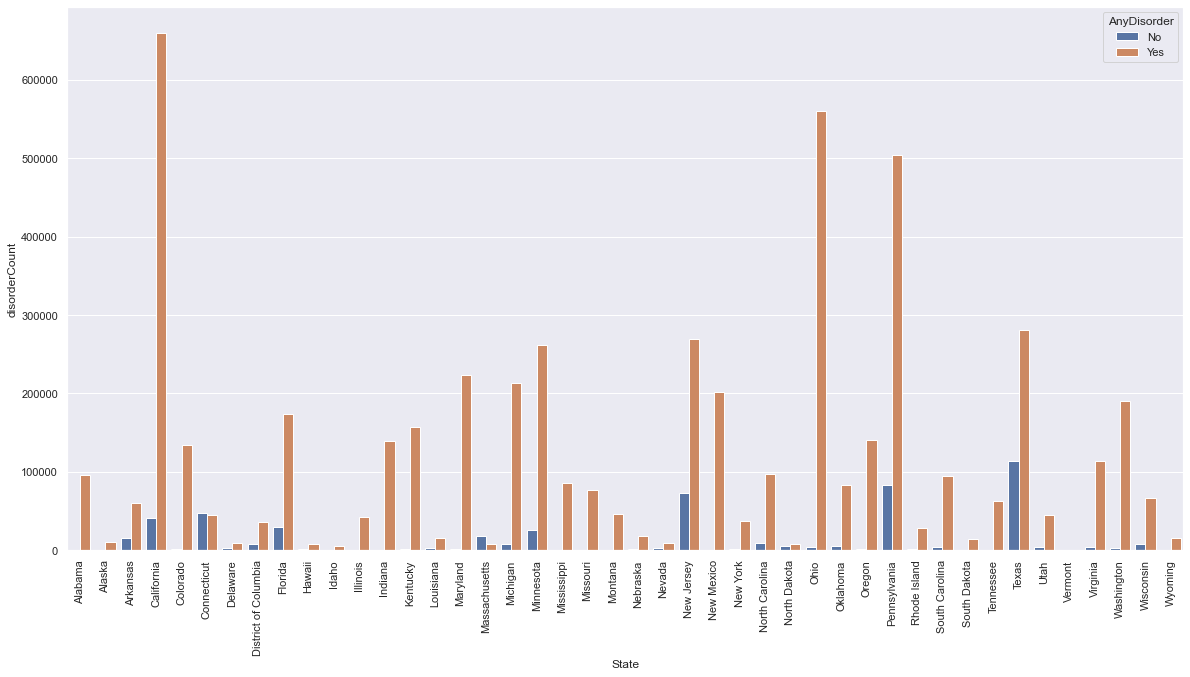

In [23]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(20, 10))

ax = sns.barplot(x = "State", y = "disorderCount", hue = "AnyDisorder", data =summary2019_disorder)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


[Text(0, 0, 'Alabama'),
 Text(1, 0, 'Alaska'),
 Text(2, 0, 'Arkansas'),
 Text(3, 0, 'California'),
 Text(4, 0, 'Colorado'),
 Text(5, 0, 'Connecticut'),
 Text(6, 0, 'Delaware'),
 Text(7, 0, 'District of Columbia'),
 Text(8, 0, 'Florida'),
 Text(9, 0, 'Hawaii'),
 Text(10, 0, 'Idaho'),
 Text(11, 0, 'Illinois'),
 Text(12, 0, 'Indiana'),
 Text(13, 0, 'Kentucky'),
 Text(14, 0, 'Louisiana'),
 Text(15, 0, 'Maryland'),
 Text(16, 0, 'Massachusetts'),
 Text(17, 0, 'Michigan'),
 Text(18, 0, 'Minnesota'),
 Text(19, 0, 'Mississippi'),
 Text(20, 0, 'Missouri'),
 Text(21, 0, 'Montana'),
 Text(22, 0, 'Nebraska'),
 Text(23, 0, 'Nevada'),
 Text(24, 0, 'New Jersey'),
 Text(25, 0, 'New Mexico'),
 Text(26, 0, 'New York'),
 Text(27, 0, 'North Carolina'),
 Text(28, 0, 'North Dakota'),
 Text(29, 0, 'Ohio'),
 Text(30, 0, 'Oklahoma'),
 Text(31, 0, 'Oregon'),
 Text(32, 0, 'Pennsylvania'),
 Text(33, 0, 'Rhode Island'),
 Text(34, 0, 'South Carolina'),
 Text(35, 0, 'South Dakota'),
 Text(36, 0, 'Tennessee'),
 Text(3

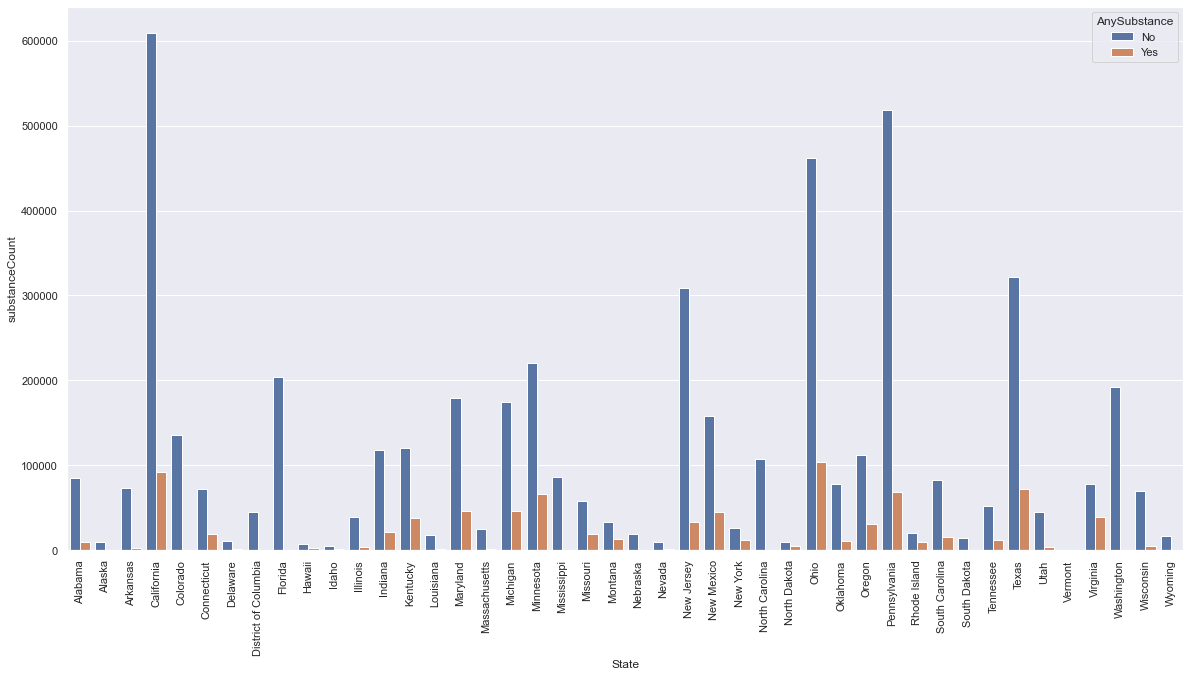

In [24]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(20, 10))

# grouped barplot
#ax.set(ylim=(0, 100))
ax = sns.barplot(x = "State", y = "substanceCount", hue = "AnySubstance", data =summary2019_substance)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


### Check if there is any correlation between the substance abuse and mental health  when both are marked as yes.

For this purpose create one table with Any Disorder and SubstanceAbuse 
Eliminate rows with no substance or mental health issues

*sumary2019* is the summary of number of cases of substance abuse and mental health disorder cases

In [38]:
summary2019 = summary2019_substance.merge(summary2019_disorder, how = "inner", left_on = ["State", 'YEAR'], right_on = ["State", 'YEAR'])

summary2019 = summary2019[summary2019['AnyDisorder']=="Yes"]
summary2019 = summary2019[summary2019['AnySubstance']=="Yes"]
summary2019.drop(['AnyDisorder','AnySubstance'], axis=1, inplace=True)
summary2019.to_csv('summary2019_cases.csv')
summary2019


,YEAR,State,substanceCount,disorderCount
3,2019,Alabama,10351,95632
7,2019,Alaska,761,10780
11,2019,Arkansas,2122,60054
15,2019,California,91626,660144
19,2019,Colorado,566,134658
23,2019,Connecticut,19657,45096
27,2019,Delaware,2090,9878
31,2019,District of Columbia,8,36528
35,2019,Florida,224,174302
39,2019,Hawaii,2454,8487


Lets see if there is any correlation betwee the substance abuse count and the mental health disorder count

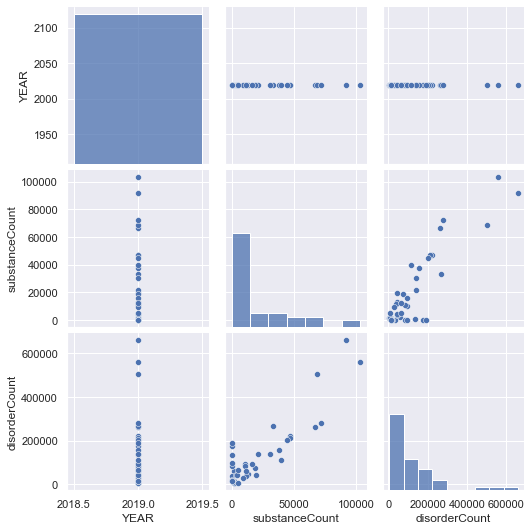

In [40]:
import seaborn as sns
sns.pairplot(summary2019)

Looking at the plot of disorderCount vs the susbtanceCount (bottom-middle and middle-right), there seems to be a positive correlation between the 2 variables. Statistical significance is to be determined but a correlation appears visually.

### In this section we curate, clean and create a summary just like we have doen for 2019, but for the year 2014

## 2014

In [42]:
import pandas as pd
file = "mhcld-puf-2014-csv.csv"
mh2014 = pd.read_csv(file1)
mh2014 = mh2014[mh2014['AGE'] != -9]
mh2014 = mh2014[mh2014['GENDER'] != -9]
mh2014 = mh2014[mh2014['IJSSERVICE'] != 1]
mh2014 = mh2014[mh2014['SMISED'] != -9]
mh2014 = mh2014[mh2014['STATEFIP'] != -99]
mh2014 = mh2014[mh2014['SMISED'] != -9]
mh2014 = mh2014[mh2014['REGION'] != 0]

mh2014['Disorder'] = mh2014[['MH1', 'MH2', 'MH3']].apply(disorder, axis=1)
mh2014['Disorder'].value_counts()
mh2014['AnyDisorder'] = mh2014[['Disorder']].apply(anydisorder, axis=1)

mh2014['SubstanceAbuse'] = mh2014[['SUB']].apply(substancelookup, axis=1)
mh2014['AnySubstance'] = mh2014[['SUB']].apply(anysubstance, axis=1)

import states
mh2014['State'] = mh2014[['STATEFIP']].apply(states.statelookupbycode, axis=1)

columnstodrop = ['MARSTAT', 'MH1', 'MH2', 'MH3']
mh2014 = mh2014.drop(['MARSTAT', 'MH1', 'MH2', 'MH3'], axis=1)

mh2014.head()


,YEAR,AGE,EDUC,ETHNIC,RACE,GENDER,SPHSERVICE,CMPSERVICE,OPISERVICE,RTCSERVICE,...,OTHERDISFLG,STATEFIP,DIVISION,REGION,CASEID,Disorder,AnyDisorder,SubstanceAbuse,AnySubstance,State
1,2019,14,4,4,6,2,1,2,2,2,...,0,1,6,3,20190000002,DEPRESSIVE,Yes,None,No,Alabama
3,2019,10,-9,4,5,2,1,1,1,2,...,0,1,6,3,20190000004,PSYCH,Yes,None,No,Alabama
4,2019,2,2,4,5,2,1,1,2,2,...,0,1,6,3,20190000005,TRAUMA,Yes,None,No,Alabama
6,2019,2,-9,4,6,1,2,1,2,1,...,1,1,6,3,20190000007,OTHER,Yes,None,No,Alabama
7,2019,8,-9,3,6,2,2,1,1,2,...,0,1,6,3,20190000008,DEPRESSIVE,Yes,None,No,Alabama


In [45]:
summary2014_bothsummary = mh2014[['YEAR','State', 'AnyDisorder', 'Disorder', 'AnySubstance']]
summary2014_bothsummary.to_csv('summary2014_anyDisSub.csv')

summary2014_perdisrodersummary = mh2014[['YEAR','State', 'AnyDisorder', 'Disorder', 'AnySubstance']]
summary2014_perdisrodersummary = summary2014_perdisrodersummary.groupby(['YEAR', 'State', 'Disorder']).agg(perDisorderCount = ('Disorder', 'count')).reset_index()
summary2014_perdisrodersummary.to_csv('summary2014_perdisorder.csv')

summary2014_disorder = summary2014_bothsummary.groupby(['YEAR','State', 'AnyDisorder']).agg(disorderCount = ('AnyDisorder', 'count')).reset_index()
summary2014_disorder.to_csv('summary2014_disorder.csv')

summary2014_substance = summary2014_bothsummary[['YEAR','State', 'AnySubstance']]
summary2014_substance = summary2014_substance.groupby(['YEAR','State', 'AnySubstance']).agg(substanceCount = ('AnySubstance', 'count')).reset_index()
summary2014_substance.to_csv('summary2014_anysubstance.csv')


summary2014 = summary2014_substance.merge(summary2014_disorder, how = "inner", left_on = ["State", 'YEAR'], right_on = ["State", 'YEAR'])

summary2014 = summary2014[summary2014['AnyDisorder']=="Yes"]
summary2014 = summary2014[summary2014['AnySubstance']=="Yes"]
summary2014.drop(['AnyDisorder','AnySubstance'], axis=1, inplace=True)
summary2014.to_csv('summary2014_cases.csv')
summary2014

,YEAR,State,substanceCount,disorderCount
3,2019,Alabama,10351,95632
7,2019,Alaska,761,10780
11,2019,Arkansas,2122,60054
15,2019,California,91626,660144
19,2019,Colorado,566,134658
23,2019,Connecticut,19657,45096
27,2019,Delaware,2090,9878
31,2019,District of Columbia,8,36528
35,2019,Florida,224,174302
39,2019,Hawaii,2454,8487


We now merge the 2 summarys for years 2014 and 2019.

In [49]:
dataframes = []
dataframes.append(summary2014)
dataframes.append(summary2019)
summary_2014_2019 = pd.concat(dataframes)
summary_2014_2019
summary_2014_2019.to_csv('summary_2014_2019_cases.csv')

## Conclustion of Part A
In this Part we did the following
a. Downloaded the Client Level Mental Health Data for 2 years 2014 and 2019. 
b. Cleaned the data to summarize the counts of mental health disorders and susbtance abuse cases
c. Merged the data from 2014 and 2019 to create 1 summary
d. Going forward because this part is very computationally intensive, I will be using the summaries saved in files created as part of this section for further analysis
i.e. sumary_2014_2019_cases.csv 

## Part B  - National Mental Health Services Survey (N-MHSS)
Mental Health Facilities Data

https://www.datafiles.samhsa.gov/dataset/national-mental-health-services-survey-2020-n-mhss-2020-ds0001

Codebook here: https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/N-MHSS-2020/N-MHSS-2020-datasets/N-MHSS-2020-DS0001/N-MHSS-2020-DS0001-info/N-MHSS-2020-DS0001-info-codebook.pdf

Dataset here: https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/N-MHSS-2020/N-MHSS-2020-datasets/N-MHSS-2020-DS0001/N-MHSS-2020-DS0001-bundles-with-study-info/N-MHSS-2020-DS0001-bndl-data-csv_v1.zip

Some information on this source dataset N-MHSS is an annual survey that collects data on the services and characteristics of all known mental health treatment facilities in the 50 states, the District of Columbia, and the U.S. territories and jurisdictions. Every other year (since 2014), the survey also collects data on the number and demographics of people served in these facilities as of a specified survey reference date.

N-MHSS is the only source of national and state-level data on the mental health service delivery system reported by both public and private specialty mental health treatment facilities, including:

Public and private psychiatric hospitals Nonfederal general hospitals with separate psychiatric units U.S. Department of Veterans Affairs medical centers Residential treatment centers for children and adults Community mental health centers Outpatient, day treatment, or partial hospitalization mental health facilities Multi-setting (nonhospital) mental health facilities N-MHSS complements the information collected through SAMHSA’s National Survey of Substance Abuse Treatment Services (N-SSATS). Treatment facility information from N-MHSS is used to populate the mental health component of SAMHSA’s Behavioral Health Treatment Services Locator.

In this section 
Goal: 
Summarize the following for years 2014 and 2019
a. Number of total facilities per state
b. Number of facilities per state that partake in mental health improvement
c. Number of facilities per state that partake in substance abuse treatment
d. Compare a-c for years 2019 and 2014.    disorders as well as substance abuse. 

In [105]:
%%bash
wget https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/N-MHSS-2019/N-MHSS-2019-datasets/N-MHSS-2019-DS0001/N-MHSS-2019-DS0001-bundles-with-study-info/N-MHSS-2019-DS0001-bndl-data-tsv.zip
unzip N-MHSS-2019-DS0001-bndl-data-tsv.zip


--2022-05-14 14:55:52--  https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/N-MHSS-2019/N-MHSS-2019-datasets/N-MHSS-2019-DS0001/N-MHSS-2019-DS0001-bundles-with-study-info/N-MHSS-2019-DS0001-bndl-data-tsv.zip
Resolving www.datafiles.samhsa.gov (www.datafiles.samhsa.gov)... 3.214.5.147, 75.101.214.125
Connecting to www.datafiles.samhsa.gov (www.datafiles.samhsa.gov)|3.214.5.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 288889 (282K) [application/zip]
Saving to: 'N-MHSS-2019-DS0001-bndl-data-tsv.zip.1'

     0K .......... .......... .......... .......... .......... 17% 1.11M 0s
    50K .......... .......... .......... .......... .......... 35%  990K 0s
   100K .......... .......... .......... .......... .......... 53%  126M 0s
   150K .......... .......... .......... .......... .......... 70% 1023K 0s
   200K .......... .......... .......... .......... .......... 88% 41.2M 0s
   250K .......... .......... .......... ..     

Archive:  N-MHSS-2019-DS0001-bndl-data-tsv.zip


replace nmhss-puf-2019-csv.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [{ENTER}]
replace nmhss-puf-2019-csv.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [wget http]
replace nmhss-puf-2019-csv.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [s://www.d]
replace nmhss-puf-2019-csv.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [atafiles.]
replace nmhss-puf-2019-csv.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [samhsa.go]
replace nmhss-puf-2019-csv.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [v/sites/d]
replace nmhss-puf-2019-csv.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [efault/fi]
replace nmhss-puf-2019-csv.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [les/field]
replace nmhss-puf-2019-csv.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [-uploads-]
replace nmhss-puf-2019-csv.csv? [y]es, 

In [8]:
import pandas as pd
file = "nmhss-puf-2019-csv.csv"
nm = pd.read_csv(file)
nm.head()

,CASEID,LST,MHINTAKE,MHDIAGEVAL,MHREFERRAL,SMISEDSUD,TREATMT,ADMINSERV,SETTINGIP,SETTINGRC,...,LICENMH,LICENSED,LICENPH,LICENSEDFCS,LICENHOS,JCAHO,CARF,COA,CMS,OTHSTATE
0,201900001,AK,1,1,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,201900002,AK,1,1,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,201900003,AK,1,1,1,1,1,0,0,0,...,1,1,1,0,0,1,0,0,1,0
3,201900004,AK,1,1,1,1,1,0,0,0,...,1,1,1,0,0,1,0,0,1,0
4,201900005,AK,1,1,1,1,1,1,0,0,...,1,0,0,0,0,0,0,1,1,0


### Since the goal is to summarize the below, we're picking only a few columns
-Number of total facilities per state
-Number of facilities per state that partake in mental health improvement
-Number of facilities per state that partake in substance abuse treatment

In [9]:
nm = nm[[
    'LST',
    'TREATMT',
    'SETTINGIP',
    'SETTINGRC',
    'SETTINGDTPH',
    'SETTINGOP',
    'FACILITYTYPE',
    'FOCUS',
    'MHINTAKE',
    'MHDIAGEVAL',
    'MHREFERRAL',
    'SRVC31'
]]

### Data filtering and derived data
1. Created a derived column "MentalHealthAssistance" <- (if any of the colums  
   SETTINGIP, SETTINGRC, SETTINGDTPH, FOCUS = 1 or 3 , MHHINTAKE, MHDIAGEVAL, MHREFERRAL is set to 1
2. 'TREATMENT' column already indicates those facilities treating substance abuse

In [10]:
def label_mha (row):
    """row -> Dataframe row 
    row is a an entire row from the dataframe"""
    if (row['SETTINGIP'] == 1) or \
       (row['SETTINGRC'] == 1) or \
       (row['SETTINGDTPH'] == 1) or \
       (row['FOCUS'] == 1) or \
       (row['FOCUS'] == 3) or \
       (row['MHINTAKE'] == 1) or \
       (row['MHDIAGEVAL'] == 1) or \
       (row['MHREFERRAL'] == 1):
        return int(1)
    else:
        return 0

In [11]:
nm['MentalHealthAssistance'] = nm.apply (lambda row: label_mha(row), axis=1)
nm['MentalHealthAssistance']= nm['MentalHealthAssistance'].astype(int)

nm['SubstanceAbuseAssistance']= nm['TREATMT'].astype(int)
nm.head()

,LST,TREATMT,SETTINGIP,SETTINGRC,SETTINGDTPH,SETTINGOP,FACILITYTYPE,FOCUS,MHINTAKE,MHDIAGEVAL,MHREFERRAL,SRVC31,MentalHealthAssistance,SubstanceAbuseAssistance
0,AK,1,0,0,0,1,7,3,1,1,1,1,1,1
1,AK,1,0,0,0,1,7,3,1,1,1,1,1,1
2,AK,1,0,0,0,1,9,3,1,1,1,1,1,1
3,AK,1,0,0,0,1,10,4,1,1,1,0,1,1
4,AK,1,0,0,0,1,7,1,1,1,1,1,1,1


### Grouping and Aggregating
1. Group by state and count the number of mentalhealth and substance abuse assistance 

In [12]:
summary_mh = nm[['LST', 'MentalHealthAssistance', 'SubstanceAbuseAssistance']]
summary_mh = summary_mh.groupby(['LST', 'MentalHealthAssistance']).agg(mhCount = ('MentalHealthAssistance', 'count')).reset_index()
summary_mh

,LST,MentalHealthAssistance,mhCount
0,AK,1,93
1,AL,1,180
2,AR,1,202
3,AZ,1,421
4,CA,1,952
5,CO,1,190
6,CT,1,230
7,DC,1,39
8,DE,1,36
9,FL,1,520


In [13]:
import numpy as np
summary_sa = nm[['LST', 'MentalHealthAssistance', 'SubstanceAbuseAssistance']]
summary_sa = summary_sa.groupby(['LST', 'SubstanceAbuseAssistance']).agg(saCount = ('SubstanceAbuseAssistance', 'count')).reset_index()
summary_sa["SubstanceAbuseAssistance"] = np.where(summary_sa["SubstanceAbuseAssistance"] == 1, "Yes", "No")
summary_sa

,LST,SubstanceAbuseAssistance,saCount
0,AK,No,31
1,AK,Yes,62
2,AL,No,113
3,AL,Yes,67
4,AR,No,112
...,...,...,...
101,WV,Yes,96
102,WY,No,7
103,WY,Yes,38
104,ZZ,No,2


### Final data transformation for the summary
1. Group by state and count the number of mentalhealth and substance abuse assistance 
2. Further Merge the 2 summary tables for mental health and substance abuse

In [14]:
import numpy as np
#summary_sa["SubstanceAbuseAssistance"] = np.where(summary_sa["SubstanceAbuseAssistance"] == 1, "Y", "N")
summary_mh["MentalHealthAssistance"] = np.where(summary_mh["MentalHealthAssistance"] == 1, "Yes", "No")

summary2019 = summary_mh.merge(summary_sa, how = "inner", left_on = "LST", right_on = "LST")
summary2019['State'] = summary2019[['LST']].apply(states.statelookupbyabbr, axis=1)

# Lets only keep rows for facilities that serve Substance Abuse and Mental Health patients
summary2019 = summary2019[summary2019['MentalHealthAssistance']=="Yes"]
summary2019 = summary2019[summary2019['SubstanceAbuseAssistance']=="Yes"]

summary2019.rename(columns = {'mhCount': 'MentalHealthFacCnt', 
                              'saCount': 'SubstanceAbuseFacCnt'},
                               inplace = True)
summary2019['YEAR'] = '2019'
len(summary2019['State'].unique())

53

In [15]:
summary2019.drop(['LST', 'MentalHealthAssistance', 'SubstanceAbuseAssistance'],  axis = 1, inplace = True)
summary2019


,MentalHealthFacCnt,SubstanceAbuseFacCnt,State,YEAR
1,93,62,Alaska,2019
3,180,67,Alabama,2019
5,202,90,Arkansas,2019
7,421,312,Arizona,2019
9,952,444,California,2019
11,190,132,Colorado,2019
13,230,160,Connecticut,2019
15,39,16,District of Columbia,2019
17,36,29,Delaware,2019
19,520,310,Florida,2019


Now we did the above for year 2019, we do the same thing for 2014

In [117]:
%%bash
wget https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/N-MHSS-2014/N-MHSS-2014-datasets/N-MHSS-2014-DS0001/N-MHSS-2014-DS0001-bundles-with-study-info/N-MHSS-2014-DS0001-bndl-data-tsv.zip
unzip N-MHSS-2014-DS0001-bndl-data-tsv.zip

--2022-05-14 15:01:55--  https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/N-MHSS-2014/N-MHSS-2014-datasets/N-MHSS-2014-DS0001/N-MHSS-2014-DS0001-bundles-with-study-info/N-MHSS-2014-DS0001-bndl-data-tsv.zip
Resolving www.datafiles.samhsa.gov (www.datafiles.samhsa.gov)... 75.101.214.125, 3.214.5.147
Connecting to www.datafiles.samhsa.gov (www.datafiles.samhsa.gov)|75.101.214.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3614130 (3.4M) [application/zip]
Saving to: 'N-MHSS-2014-DS0001-bndl-data-tsv.zip'

     0K .......... .......... .......... .......... ..........  1%  573K 6s
    50K .......... .......... .......... .......... ..........  2% 1.10M 5s
   100K .......... .......... .......... .......... ..........  4% 20.2M 3s
   150K .......... .......... .......... .......... ..........  5% 1.14M 3s
   200K .......... .......... .......... .......... ..........  7% 20.2M 2s
   250K .......... .......... .......... .....

Archive:  N-MHSS-2014-DS0001-bndl-data-tsv.zip
  inflating: N-MHSS-2014-DS0001-info/N-MHSS-2014-info-description.pdf  
  inflating: N-MHSS-2014-DS0001-info/N-MHSS-2014-info-bibliography.xml  
  inflating: N-MHSS-2014-DS0001-info/N-MHSS-2014-info-variables-ddi.xml  
  inflating: N-MHSS-2014-DS0001-info/N-MHSS-2014-DS0001-info-codebook.pdf  
  inflating: N-MHSS-2014-DS0001-info/N-MHSS-2014-DS0001-info-variables-ddi.xml  
  inflating: N-MHSS-2014-DS0001-info/N-MHSS-2014-DS0001-info-questionnaire-other1.pdf  
  inflating: N-MHSS-2014-DS0001-data/N-MHSS-2014-DS0001-data-excel.csv  


In [2]:
import pandas as pd
file = "./N-MHSS-2014-DS0001-data/N-MHSS-2014-DS0001-data-excel.csv"
nm = pd.read_csv(file)
nm.head()


,CASEID,LST,MHINTAKE,MHDIAGEVAL,MHREFERRAL,TREATMT,ADMINSERV,SETTINGIP,SETTINGRC,SETTINGDTPH,...,OPRACEPERUNK,OPLEGALTOTVOL,OPLEGALPERVOL,OPLEGALTOTNONFOREN,OPLEGALPERNONFOREN,OPLEGALTOTFOREN,OPLEGALPERFOREN,COD_PCT,TOTADMIS,PERCENTVA
0,201400001,AL,1,1,1,1,1,1,0,0,...,-2,-2,-2,-2,-2,-2,-2,1,7,1
1,201400002,AL,1,1,1,0,1,0,0,0,...,-2,-2,-2,-2,-2,-2,-2,-2,-1,-2
2,201400003,AL,1,0,1,0,0,0,0,1,...,-2,-2,-2,-2,-2,-2,-2,-2,-1,-2
3,201400004,AL,1,1,1,1,1,1,0,0,...,7,9,7,0,0,0,0,0,8,1
4,201400005,AL,1,1,1,0,1,1,0,0,...,-2,-2,-2,-2,-2,-2,-2,2,6,1


In [3]:
nm = nm[[
    'LST',
    'TREATMT',
    'SETTINGIP',
    'SETTINGRC',
    'SETTINGDTPH',
    'SETTINGOP',
    'FACILITYTYPE',
    'FOCUS',
    'MHINTAKE',
    'MHDIAGEVAL',
    'MHREFERRAL',
    'SRVC31'
]]
nm['MentalHealthAssistance'] = nm.apply (lambda row: label_mha(row), axis=1)
nm['MentalHealthAssistance']= nm['MentalHealthAssistance'].astype(int)

nm['SubstanceAbuseAssistance']= nm['TREATMT'].astype(int)

summary_mh = nm[['LST', 'MentalHealthAssistance', 'SubstanceAbuseAssistance']]
summary_mh = summary_mh.groupby(['LST', 'MentalHealthAssistance']).agg(mhCount = ('MentalHealthAssistance', 'count')).reset_index()
summary_mh



,LST,MentalHealthAssistance,mhCount
0,AK,1,100
1,AL,1,201
2,AR,1,265
3,AS,1,2
4,AZ,0,4
...,...,...,...
61,WA,0,4
62,WA,1,256
63,WI,1,462
64,WV,1,117


In [4]:
import numpy as np
import states
summary_sa = nm[['LST', 'MentalHealthAssistance', 'SubstanceAbuseAssistance']]
summary_sa = summary_sa.groupby(['LST', 'SubstanceAbuseAssistance']).agg(saCount = ('SubstanceAbuseAssistance', 'count')).reset_index()
summary_sa["SubstanceAbuseAssistance"] = np.where(summary_sa["SubstanceAbuseAssistance"] == 1, "Yes", "No")

import numpy as np
#summary_sa["SubstanceAbuseAssistance"] = np.where(summary_sa["SubstanceAbuseAssistance"] == 1, "Y", "N")
summary_mh["MentalHealthAssistance"] = np.where(summary_mh["MentalHealthAssistance"] == 1, "Yes", "No")

summary2014 = summary_mh.merge(summary_sa, how = "inner", left_on = "LST", right_on = "LST")
summary2014['State'] = summary2014[['LST']].apply(states.statelookupbyabbr, axis=1)


In [5]:

# Lets only keep rows for facilities that serve Substance Abuse and Mental Health patients
summary2014 = summary2014[summary2014['MentalHealthAssistance']=="Yes"]
summary2014 = summary2014[summary2014['SubstanceAbuseAssistance']=="Yes"]

summary2014.rename(columns = {'mhCount': 'MentalHealthFacCnt', 
                              'saCount': 'SubstanceAbuseFacCnt'},
                               inplace = True)
summary2014

,LST,MentalHealthAssistance,MentalHealthFacCnt,SubstanceAbuseAssistance,SubstanceAbuseFacCnt,State
1,AK,Yes,100,Yes,58,Alaska
3,AL,Yes,201,Yes,59,Alabama
5,AR,Yes,265,Yes,99,Arkansas
6,AS,Yes,2,Yes,2,American Samoa
10,AZ,Yes,432,Yes,298,Arizona
14,CA,Yes,878,Yes,387,California
16,CO,Yes,202,Yes,150,Colorado
18,CT,Yes,251,Yes,157,Connecticut
20,DC,Yes,39,Yes,23,District of Columbia
22,DE,Yes,43,Yes,19,Delaware


In [7]:
#len(summary2014['State'].unique())

summary2014.drop(['LST', 'MentalHealthAssistance', 'SubstanceAbuseAssistance'],  axis = 1, inplace = True)
summary2014['YEAR'] = '2014'
summary2014

,MentalHealthFacCnt,SubstanceAbuseFacCnt,State,YEAR
1,100,58,Alaska,2014
3,201,59,Alabama,2014
5,265,99,Arkansas,2014
6,2,2,American Samoa,2014
10,432,298,Arizona,2014
14,878,387,California,2014
16,202,150,Colorado,2014
18,251,157,Connecticut,2014
20,39,23,District of Columbia,2014
22,43,19,Delaware,2014


Final merge of the nmhss data for years 2014 and 2019

In [16]:
dataframes = []
dataframes.append(summary2014)
dataframes.append(summary2019)
summary_2014_2019 = pd.concat(dataframes)
summary_2014_2019
summary_2014_2019.to_csv('summary_2014_2019_nmhss.csv')

## Conclustion of Part B
In this Part we did the following
a. Downloaded the Mental Health Facilities Data for 2 years 2014 and 2019. 

b. Cleaned the data to summarize the counts of facilities that assist mental health disorders and susbtance abuse cases independently

c. Merged the data from 2014 and 2019 to create 1 summary

d. Going forward because this part is very computationally intensive, I will be using the summaries saved in files created as part of this section for further analysis

i.e. sumary_2014_2019_nmhss.csv 

## Part C  - 

In this section the goal is to use the following data 
* data created in part A and part B
* population data.


### Obtain population data and 
This section obtains population data for every state from a public website. There is only 1 table on this website with no mention of a name so it became intuitive to access the only table at index 0

In the larger scheme of things, this population data is obtained to draw a relative percentage per state. Reference link: http://www.stats.indiana.edu/population/poptotals/historic_counts_states.asp

In [18]:
!pip3 install lxml
!pip3 install html5lib
#!pip3 install beautifulsoup4

     |████████████████████████████████| 112 kB 4.4 MB/s eta 0:00:01


In [19]:
import pandas as pd
dfs = pd.read_html('http://www.stats.indiana.edu/population/poptotals/historic_counts_states.asp')
poptable = dfs[0]
poptable.info()
poptable.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   52 non-null     object
 1   1900    52 non-null     int64 
 2   1910    52 non-null     int64 
 3   1920    52 non-null     int64 
 4   1930    52 non-null     int64 
 5   1940    52 non-null     int64 
 6   1950    52 non-null     int64 
 7   1960    52 non-null     int64 
 8   1970    52 non-null     int64 
 9   1980    52 non-null     int64 
 10  1990    52 non-null     int64 
 11  2000    52 non-null     int64 
 12  2010    52 non-null     int64 
 13  2020    52 non-null     int64 
dtypes: int64(13), object(1)
memory usage: 5.8+ KB


,State,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
0,United States,76212168,92228496,106021537,123202624,132164569,151325798,179323175,203302031,226545805,248709873,281421906,308745538,331449281
1,Alabama,1828697,2138093,2348174,2646248,2832961,3061743,3266740,3444354,3893888,4040587,4447100,4779736,5024279
2,Alaska,63592,64356,55036,59278,72524,128643,226167,302583,401851,550043,626932,710231,733391
3,Arizona,122931,204354,334162,435573,499261,749587,1302161,1775399,2718215,3665228,5130632,6392017,7151502
4,Arkansas,1311564,1574449,1752204,1854482,1949387,1909511,1786272,1923322,2286435,2350725,2673400,2915918,3011524


Let's only keep this data
1. Only state data (not country)
2. Only for years 2010 and 2020

In [20]:
poptable = poptable[['State','2010', '2020']]
poptable = poptable[poptable['State']!= 'United States']
poptable

,State,2010,2020
1,Alabama,4779736,5024279
2,Alaska,710231,733391
3,Arizona,6392017,7151502
4,Arkansas,2915918,3011524
5,California,37253956,39538223
6,Colorado,5029196,5773714
7,Connecticut,3574097,3605944
8,Delaware,897934,989948
9,District of Columbia,601723,689545
10,Florida,18801310,21538187


Given census data is ONLY collected every 10 years and we are limited to have nmhss and nmhcld data for years 2014 and 2019. The approach I am taking is to use the percentage change between 2010 and 2020 and apply it to arrive at an estimated population in 2014 and 2019

In [26]:
poptable['PopChangePerYear'] = (poptable['2020'] - poptable['2010'])/10
poptable

,State,2010,2020,PopChange,2014,2019,PopChangePerYear
1,Alabama,4779736,5024279,0.051162,5757908.0,6980623.0,24454.3
2,Alaska,710231,733391,0.032609,802871.0,918671.0,2316.0
3,Arizona,6392017,7151502,0.118818,9429957.0,13227382.0,75948.5
4,Arkansas,2915918,3011524,0.032788,3298342.0,3776372.0,9560.6
5,California,37253956,39538223,0.061316,46391024.0,57812359.0,228426.7
6,Colorado,5029196,5773714,0.148039,8007268.0,11729858.0,74451.8
7,Connecticut,3574097,3605944,0.008911,3701485.0,3860720.0,3184.7
8,Delaware,897934,989948,0.102473,1265990.0,1726060.0,9201.4
9,District of Columbia,601723,689545,0.145951,953011.0,1392121.0,8782.2
10,Florida,18801310,21538187,0.145568,29748818.0,43433203.0,273687.7


Use the overall change over 10 years to estimate the population in years 2014 and 2019

In [33]:
poptable['2014'] = poptable['2010'] + round(4 * poptable['PopChangePerYear'])
poptable['2019'] = poptable['2010'] + round(9 * poptable['PopChangePerYear'])
poptable.to_csv("summary_pop.csv")
poptable


,State,2010,2020,PopChange,2014,2019,PopChangePerYear
1,Alabama,4779736,5024279,0.051162,4877553.0,4999825.0,24454.3
2,Alaska,710231,733391,0.032609,719495.0,731075.0,2316.0
3,Arizona,6392017,7151502,0.118818,6695811.0,7075553.0,75948.5
4,Arkansas,2915918,3011524,0.032788,2954160.0,3001963.0,9560.6
5,California,37253956,39538223,0.061316,38167663.0,39309796.0,228426.7
6,Colorado,5029196,5773714,0.148039,5327003.0,5699262.0,74451.8
7,Connecticut,3574097,3605944,0.008911,3586836.0,3602759.0,3184.7
8,Delaware,897934,989948,0.102473,934740.0,980747.0,9201.4
9,District of Columbia,601723,689545,0.145951,636852.0,680763.0,8782.2
10,Florida,18801310,21538187,0.145568,19896061.0,21264499.0,273687.7


### Lets join the 2 files created in parts a and b to create a summary by year and state of cases, facilities 
This section obtains population data for every state from a public website. There is only 1 table on this website with no mention of a name so it became intuitive to access the only table at index 0

In the larger scheme of things, this population data is obtained to draw a relative percentage per state. Reference link: http://www.stats.indiana.edu/population/poptotals/historic_counts_states.asp

In [34]:
import pandas as pd
import numpy as np
cases = pd.read_csv('summary_2014_2019_cases.csv')
cases.head()

,Unnamed: 0,YEAR,State,substanceCount,disorderCount
0,3,2019,Alabama,10351,95632
1,7,2019,Alaska,761,10780
2,11,2019,Arkansas,2122,60054
3,15,2019,California,91626,660144
4,19,2019,Colorado,566,134658


In [35]:
fac = pd.read_csv('summary_2014_2019_nmhss.csv')
fac.head()

,Unnamed: 0,MentalHealthFacCnt,SubstanceAbuseFacCnt,State,YEAR
0,1,100,58,Alaska,2014
1,3,201,59,Alabama,2014
2,5,265,99,Arkansas,2014
3,6,2,2,American Samoa,2014
4,10,432,298,Arizona,2014


In [42]:
pop = pd.read_csv('summary_pop.csv')
pop = pop[['State', '2014','2019','2010','2020']]
pop.head()


,State,2014,2019,2010,2020
0,Alabama,4877553.0,4999825.0,4779736,5024279
1,Alaska,719495.0,731075.0,710231,733391
2,Arizona,6695811.0,7075553.0,6392017,7151502
3,Arkansas,2954160.0,3001963.0,2915918,3011524
4,California,38167663.0,39309796.0,37253956,39538223


Given the format of the table, I'd like to unpivot the data to make it easier to join it to the other data set.

In [44]:
popnew = pop.melt(id_vars = ['State'],
                 value_vars = ['2014', '2019'],
                 var_name = 'YEAR',
                 value_name = 'Population')
popnew

,State,YEAR,Population
0,Alabama,2014,4877553.0
1,Alaska,2014,719495.0
2,Arizona,2014,6695811.0
3,Arkansas,2014,2954160.0
4,California,2014,38167663.0
...,...,...,...
97,Virginia,2019,8568356.0
98,Washington,2019,7607207.0
99,West Virginia,2019,1799644.0
100,Wisconsin,2019,5873045.0
